In [1]:
import ast
import copy
import os
import sys

In [2]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
from sklearn.metrics import recall_score
from torch.utils.data import DataLoader
from torchvision import transforms as T
from tqdm import tqdm_notebook as tqdm
import albumentations as A

In [3]:
sys.path.append('src')
from dataset import BengaliDatasetTrain

In [4]:
def show_imgs(dataset, nrow=5, ncol=5, figsize=(20, 8)):
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        image = np.array(dataset[i]['image']).astype(np.uint8)
        if image.shape[0] == 1:
            image = image[0, :, :]
        else:
            image = image.transpose(1, 2, 0)
        ax.imshow(image, cmap='Greys')
    plt.tight_layout()
    plt.show()

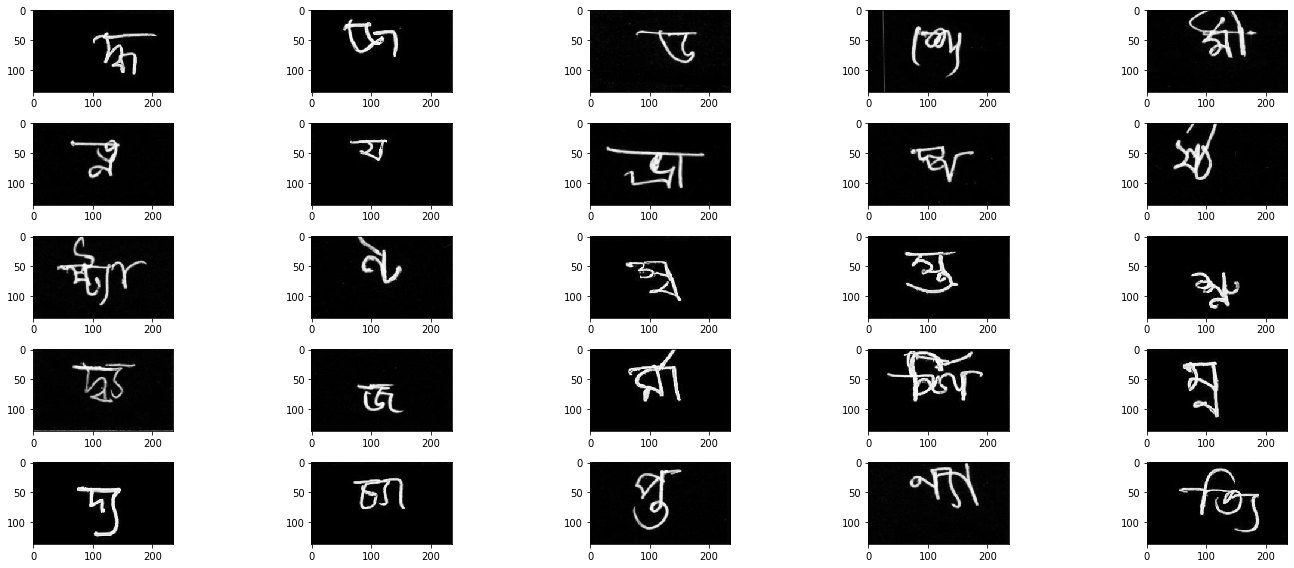

In [22]:
dataset = BengaliDatasetTrain(folds=( 3, 4), RGB=False)
show_imgs(dataset)

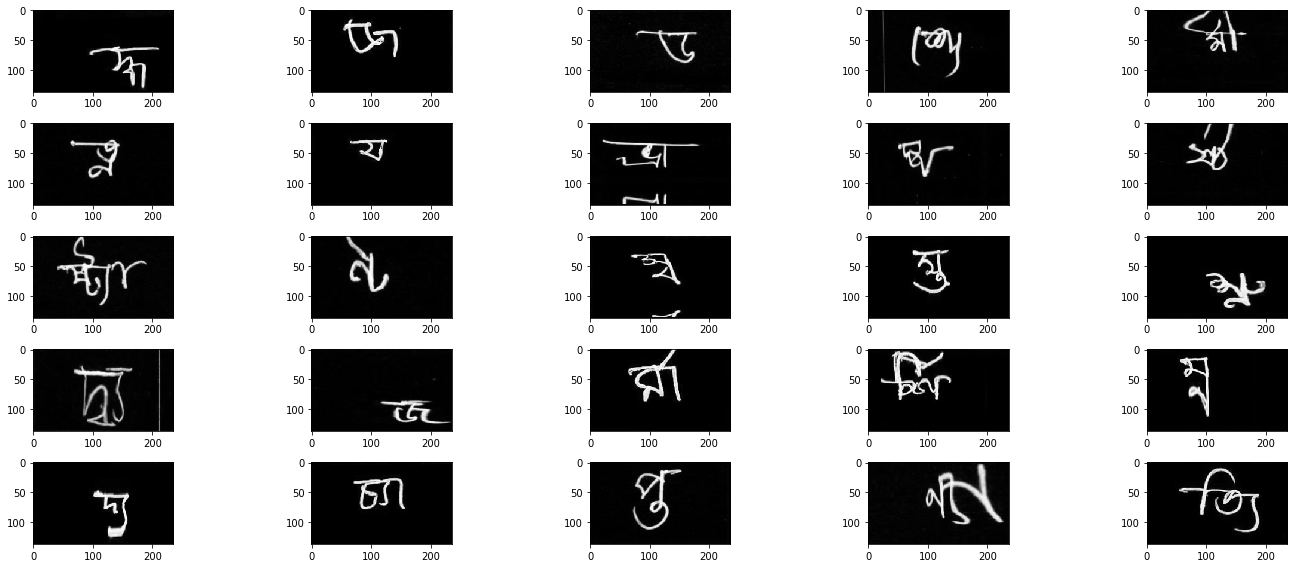

In [23]:
aug = A.Compose([
    A.GridDistortion(num_steps=5, distort_limit=0.6, p=0.5)
])
dataset.aug = aug
show_imgs(dataset)

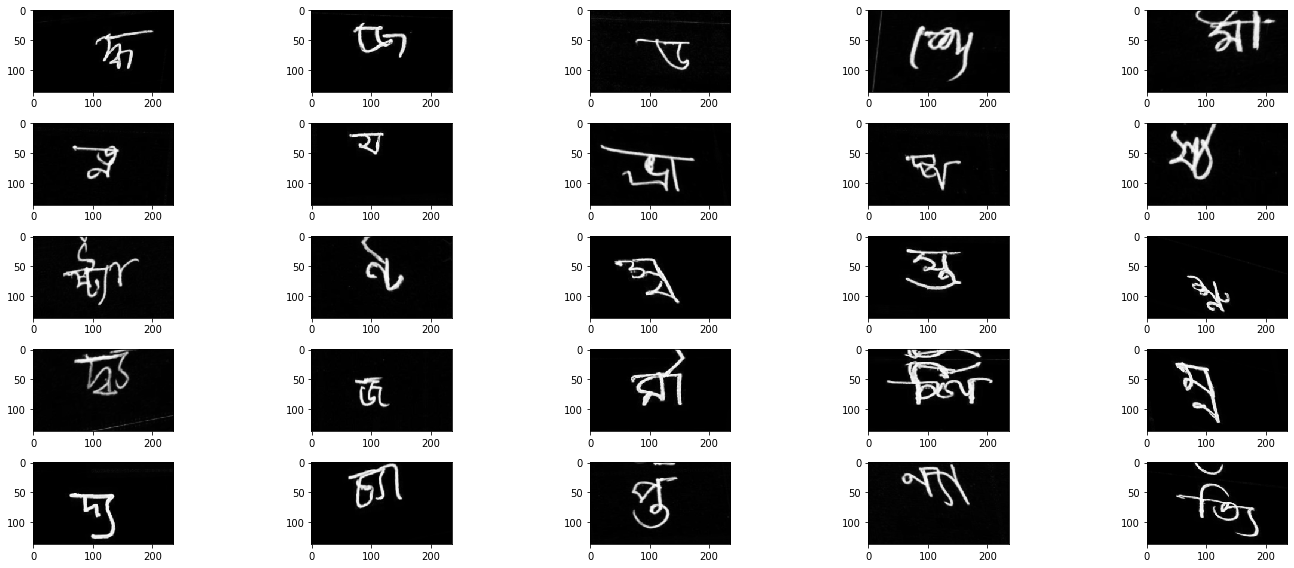

In [24]:
aug = A.Compose([
    A.ElasticTransform(alpha=0, sigma=50, alpha_affine=13, p=1)
])
dataset.aug = aug
show_imgs(dataset)